In [1]:
#neural network

In [3]:
!pip install tensorflow

In [8]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
%matplotlib inline

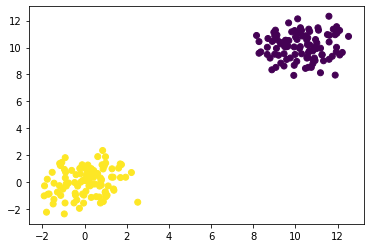

In [9]:
data = np.random.randn(200, 3)
data[:100, :2] += (10, 10)
data[:100, 2] = 0
data[100:, 2] = 1

fig, ax = plt.subplots()
ax.scatter(x=data[:,0], y=data[:,1], c=data[:,2])

In [12]:
x=data[:,:2]
y=data[:,2]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [13]:
model = Sequential()
model.add(Dense(1, input_dim=2, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
model.fit(X_train, y_train, epochs=1000, batch_size=32, verbose=0)

In [15]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 0s/step - loss: 0.0247 - accuracy: 1.0000


[0.024739151820540428, 1.0]

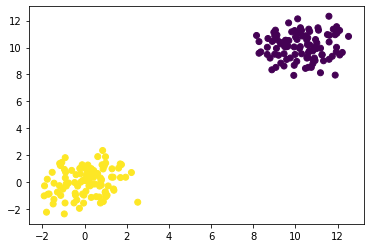

In [19]:
y_pred = model.predict(x)
y_pred = np.where(y_pred < .5, 0, 1)

fig, ax = plt.subplots()
ax.scatter(x=x[:,0], y=x[:,1], c=y_pred)

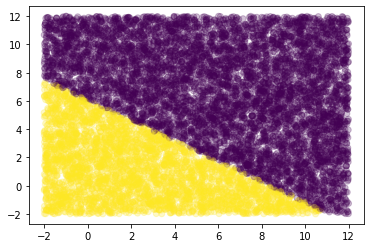

In [20]:
X_full = np.random.rand(10000, 2)
X_full = X_full*(14, 14) + (-2, -2)

y_full = model.predict(X_full)
y_full = np.where(y_full < .5, 0, 1)

fig, ax = plt.subplots()
ax.scatter(x=X_full[:,0], y=X_full[:,1], c=y_full, alpha=.25)

In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
data=pd.read_csv("https://raw.githubusercontent.com/LearnPythonWithRune/MachineLearningWithPython/main/files/diabetes.csv")

In [11]:
data.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age,Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
data.isna().sum()

Number of times pregnant        0
Plasma glucose concentration    0
Diastolic blood pressure        0
Triceps skin fold thickness     0
2-Hour serum insulin            0
Body mass index                 0
Diabetes pedigree function      0
Age                             0
Class variable                  0
dtype: int64

In [18]:
X=data.iloc[:,:-1]
Y=data.iloc[:,-1]

In [16]:
X

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [19]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Class variable, Length: 768, dtype: int64

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)

In [33]:
accuracies = []
for i in range(10):
    tf.random.set_seed(i)
    model=Sequential()
    model.add(Dense(1,input_dim=8, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train,Y_train,epochs=1500, batch_size=100, verbose=0)
    _, accuracy=model.evaluate(X_test,Y_test)
    accuracies.append(accuracy*100)
    

6/6 [==============================] - 0s 798us/step - loss: 0.5238 - accuracy: 0.7760


In [35]:
sum(accuracies)/len(accuracies)

75.15625

In [37]:
Y_pred=model.predict(X)
Y_pred=np.where(Y_pred<.5,0,1)

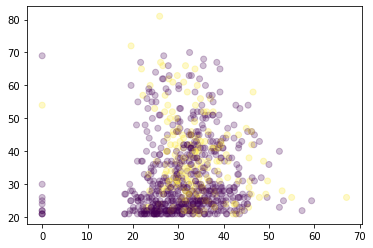

In [40]:
differ=np.abs(Y.to_numpy() -Y_pred.T)

fig, ax=plt.subplots()
ax.scatter(x=X["Body mass index"],y=X["Age"],c=differ,alpha=.25)